In [25]:
##IMPORT
#import the packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
import itertools
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import GridSearchCV
ols = linear_model.LinearRegression()

#import the data
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
cleanedtrain = pd.read_csv('cleanedtrain.csv')
cleanedtest = pd.read_csv('cleanedtest.csv')
cleanedtrainylog = pd.read_csv('cleanedtrainwithYlog.csv')

liso = ['YearBuilt',
'YearRemodAdd',
'Street_Pave',
'OverallCond',
'OverallQual',
'Condition2_PosA',
'Neighborhood_StoneBr',
'RoofMatl_WdShngl',
'Neighborhood_NridgHt',
'GarageCars',
'GrLivArea',
'Neighborhood_Crawfor',
'Functional_Typ',
'SaleType_New',
'Neighborhood_NoRidge',
'BsmtQual_No',
'1stFlrSF',
'BsmtExposure_Gd',
'MSZoning_FV',
'Exterior1st_BrkFace',
'Heating_GasW',
'BsmtFullBath',
'Condition1_Norm',
'Fireplaces',
'Exterior2nd_ImStucc',
'FullBath',
'SaleCondition_Normal',
'Neighborhood_Somerst',
'HalfBath',
'CentralAir_Y',
'RoofMatl_Membran',
'MasVnrType_Stone',
'MSZoning_RL',
'Heating_Wall',
'Exterior1st_VinylSd',
'TotalBsmtSF',
'LotArea',
'LotShape_IR2',
'Exterior2nd_Stucco',
'Neighborhood_ClearCr',
'Foundation_PConc',
'TotalSF',
'HouseStyle_SFoyer',
'PavedDrive_Y',
'PoolArea',
'BsmtCond_Po',
'BsmtFinType1_No',
'Electrical_FuseF',
'GarageType_BuiltIn',
'BsmtFinSF1',
'TotalBath',
'2ndFlrSF',
'ScreenPorch',
'Exterior2nd_VinylSd',
'ExterCond_TA',
'HouseStyle_2Story',
'GarageType_Detchd',
'BsmtFinType1_GLQ',
'OpenPorchSF',
'BsmtFinType2_No',
'TotalPorchSF',
'WoodDeckSF',
'Foundation_Stone',
'Exterior1st_Stucco',
'HouseStyle_1.5Unf',
'Exterior2nd_CmentBd']

In [2]:
#Create DataFrame with all the independant variables and betas
temp_df = cleanedtrainylog.drop(['ylogSalePrice'], axis=1)
# temp_df = temp_df.astype(int)
#appending to an empty list, creating into an array then transposing
ll = []
for column in temp_df:
    ll.append(list(temp_df[column]))
lla = np.array(ll[1:])
x_m = lla.T
y_m = list(cleanedtrainylog['ylogSalePrice'])

,YearBuilt,YearRemodAdd,Street_Pave,OverallCond,OverallQual,Condition2_PosA,Neighborhood_StoneBr,RoofMatl_WdShngl,Neighborhood_NridgHt,GarageCars,...,GarageType_Detchd,BsmtFinType1_GLQ,OpenPorchSF,BsmtFinType2_No,TotalPorchSF,WoodDeckSF,Foundation_Stone,Exterior1st_Stucco,HouseStyle_1.5Unf,Exterior2nd_CmentBd
count,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.00000,1456.000000,1456.000000,1456.000000,...,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000
mean,15.137215,15.158894,0.995879,3.160594,3.254515,0.000687,0.01717,0.003434,0.052885,2.054847,...,0.265797,0.284341,4.241787,0.026099,7.476420,4.713774,0.004121,0.016484,0.009615,0.040522
std,0.047987,0.032561,0.064084,0.222661,0.266437,0.026207,0.12995,0.058520,0.223880,0.361325,...,0.441908,0.451255,3.102943,0.159484,3.324313,3.980433,0.064084,0.127369,0.097619,0.197248
min,14.977122,15.103852,0.000000,1.730463,1.730463,0.000000,0.00000,0.000000,0.000000,1.000000,...,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,15.110234,15.130503,1.000000,3.055642,3.055642,0.000000,0.00000,0.000000,0.000000,1.730463,...,0.000000,0.000000,1.000000,0.000000,6.172535,1.000000,0.000000,0.000000,0.000000,0.000000
50%,15.138816,15.172668,1.000000,3.055642,3.259674,0.000000,0.00000,0.000000,0.000000,2.194318,...,0.000000,0.000000,5.137711,0.000000,8.672745,1.000000,0.000000,0.000000,0.000000,0.000000
75%,15.182841,15.189087,1.000000,3.259674,3.440268,0.000000,0.00000,0.000000,0.000000,2.194318,...,1.000000,1.000000,6.914940,0.000000,9.737599,8.724359,0.000000,0.000000,0.000000,0.000000
max,15.198437,15.198437,1.000000,3.750250,3.885846,1.000000,1.00000,1.000000,1.000000,2.820334,...,1.000000,1.000000,11.501575,1.000000,13.200544,12.695834,1.000000,1.000000,1.000000,1.000000


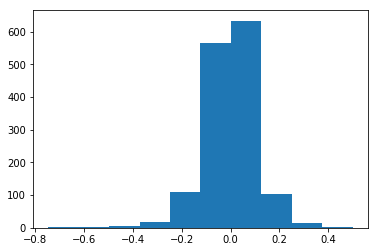

In [22]:
#Creating variables for the model.
tempfull = temp_df.iloc[:,1:]
temp = temp_df.loc[:,liso]
featuresfull = tempfull.copy()
features = temp.copy()
price   = cleanedtrainylog['ylogSalePrice']

#LM and basic histogram to check normality and distribution
lm = LinearRegression()
lm.fit(features, price)
residuals = price - lm.predict(features)
plt.hist(residuals)
temp.describe()

In [44]:
#Testing and creating csv for Kaggle
cleanedtestx = cleanedtest.loc[:,liso]
testresults = lm.predict(cleanedtestx)
testresults = pd.DataFrame({'Id' : test['Id'], 'SalePrice' : testresults})
testresults['SalePrice'] = np.exp(testresults['SalePrice'])
testresults
testresults.to_csv('MLRPredictions.csv',index = False)

In [21]:
# #Checking scores and betas
# print('R^2 is equal to %.3f' %(lm.score(features, price)))
# print('RSS is equal to %.3f' %(np.sum((price-lm.predict(features))**2)))
# print('The intercept is %.3f' %(lm.intercept_))
# print('The slopes are %s' %(lm.coef_))

In [20]:
# #positive and negative slopes if ever
# print('negative slope column names %s' %(features.columns[lm.coef_<0]))
# print('positive slope column names %s' %(features.columns[lm.coef_>0]))

In [19]:
# #initialize a dictionary for Brute Force feature selection, Thanks mikolaj!
# scores = {}
# #loop through each 3 column combination of the dataframe and fit a linear model with each combo
# #add the R^2 to dictionary as a key and the combo as the value for each 3 combo
# for i in range(0,2000):
#     combo = list(itertools.combinations(featuresfull.columns,3))[i]
# #     combo = list(randomcombination(featuresfull.columns,3))[i]
#     combo_list = list(combo)
#     lm.fit(featuresfull[combo_list],price)
#     scores[lm.score(featuresfull[combo_list],price)] = combo_list
#     print ('Working...{}.'.format(i))

In [18]:
# # sorted(scores.items(), key=lambda t:t[1], reverse=True)[:10]
# for key in sorted(scores):
#    print(key, scores[key])

In [7]:
#Statsmodel package from the HW
import statsmodels.api as sm
x = sm.add_constant(features)
model = sm.OLS(price, x)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:          ylogSalePrice   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                     268.8
Date:                Wed, 13 Nov 2019   Prob (F-statistic):               0.00
Time:                        18:57:45   Log-Likelihood:                 1181.5
No. Observations:                1456   AIC:                            -2231.
Df Residuals:                    1390   BIC:                            -1882.
Df Model:                          65                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  -20.3852 

/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [8]:
# pValues = results.pvalues
# print('The significant coefficients')
# pValues[pValues<0.05]

In [9]:
# print('The insignificant coefficients')
# pValues[pValues>=0.05]

In [10]:
#Scaling data for cross validation
scaler = MinMaxScaler(feature_range=(0, 1))
tempx = scaler.fit_transform(temp)

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [11]:
#Cross Validation with printed indices
scores = []
best_svr = SVR(kernel='rbf')
cv = KFold(n_splits=10, random_state=42, shuffle=False)
for train_index, test_index in cv.split(tempx):
    print("Train Index: ", train_index, "\n")
    print("Test Index: ", test_index)

    X_train, X_test, y_train, y_test = tempx[train_index], tempx[test_index], price[train_index], price[test_index]
    best_svr.fit(X_train, y_train)
    scores.append(best_svr.score(X_test, y_test))

Train Index:  [ 146  147  148 ... 1453 1454 1455] 

Test Index:  [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145]
Train Index:  [   0    1    2 ... 1453 1454 1455] 

Test Index:  [146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163
 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181
 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199
 200 201 202 203 204 205 206 207 208 209 210 211 212 213 

/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Train Index:  [   0    1    2 ... 1453 1454 1455] 

Test Index:  [438 439 440 441 442 443 444 445 446 447 448 449 450 451 452 453 454 455
 456 457 458 459 460 461 462 463 464 465 466 467 468 469 470 471 472 473
 474 475 476 477 478 479 480 481 482 483 484 485 486 487 488 489 490 491
 492 493 494 495 496 497 498 499 500 501 502 503 504 505 506 507 508 509
 510 511 512 513 514 515 516 517 518 519 520 521 522 523 524 525 526 527
 528 529 530 531 532 533 534 535 536 537 538 539 540 541 542 543 544 545
 546 547 548 549 550 551 552 553 554 555 556 557 558 559 560 561 562 563
 564 565 566 567 568 569 570 571 572 573 574 575 576 577 578 579 580 581
 582 583]
Train Index:  [   0    1    2 ... 1453 1454 1455] 

Test Index:  [584 585 586 587 588 589 590 591 592 593 594 595 596 597 598 599 600 601
 602 603 604 605 606 607 608 609 610 611 612 613 614 615 616 617 618 619
 620 621 622 623 624 625 626 627 628 629 630 631 632 633 634 635 636 637
 638 639 640 641 642 643 644 645 646 647 648 649 650 651 

/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Train Index:  [   0    1    2 ... 1453 1454 1455] 

Test Index:  [ 876  877  878  879  880  881  882  883  884  885  886  887  888  889
  890  891  892  893  894  895  896  897  898  899  900  901  902  903
  904  905  906  907  908  909  910  911  912  913  914  915  916  917
  918  919  920  921  922  923  924  925  926  927  928  929  930  931
  932  933  934  935  936  937  938  939  940  941  942  943  944  945
  946  947  948  949  950  951  952  953  954  955  956  957  958  959
  960  961  962  963  964  965  966  967  968  969  970  971  972  973
  974  975  976  977  978  979  980  981  982  983  984  985  986  987
  988  989  990  991  992  993  994  995  996  997  998  999 1000 1001
 1002 1003 1004 1005 1006 1007 1008 1009 1010 1011 1012 1013 1014 1015
 1016 1017 1018 1019 1020]
Train Index:  [   0    1    2 ... 1453 1454 1455] 

Test Index:  [1021 1022 1023 1024 1025 1026 1027 1028 1029 1030 1031 1032 1033 1034
 1035 1036 1037 1038 1039 1040 1041 1042 1043 1044 1045 1046 1

/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Train Index:  [   0    1    2 ... 1308 1309 1310] 

Test Index:  [1311 1312 1313 1314 1315 1316 1317 1318 1319 1320 1321 1322 1323 1324
 1325 1326 1327 1328 1329 1330 1331 1332 1333 1334 1335 1336 1337 1338
 1339 1340 1341 1342 1343 1344 1345 1346 1347 1348 1349 1350 1351 1352
 1353 1354 1355 1356 1357 1358 1359 1360 1361 1362 1363 1364 1365 1366
 1367 1368 1369 1370 1371 1372 1373 1374 1375 1376 1377 1378 1379 1380
 1381 1382 1383 1384 1385 1386 1387 1388 1389 1390 1391 1392 1393 1394
 1395 1396 1397 1398 1399 1400 1401 1402 1403 1404 1405 1406 1407 1408
 1409 1410 1411 1412 1413 1414 1415 1416 1417 1418 1419 1420 1421 1422
 1423 1424 1425 1426 1427 1428 1429 1430 1431 1432 1433 1434 1435 1436
 1437 1438 1439 1440 1441 1442 1443 1444 1445 1446 1447 1448 1449 1450
 1451 1452 1453 1454 1455]


/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [16]:
#fit and append for scores list.
best_svr.fit(X_train, y_train)
scores.append(best_svr.score(X_test, y_test))

/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [12]:
#score is still upper 70s/80
print(np.mean(scores))

0.9058521836120569


In [42]:
# cross_val_score(best_svr, tempx, price, cv=10)

In [14]:
# cross_val_predict(best_svr, tempx, price, cv=10)